In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
dataset=pd.read_csv(r'C:\Users\muham\Desktop\dersler ve projeler\makine öğrenmesi proje\veri_algoritma_yeni.csv')

In [4]:
dataset.head(60)

,Arka_Kamera_Sayisi,Cep_Telefonu_Modeli,Dahili_Hafiza,Dokunmatik_Ekran,Garanti_Süresi,NFC,RAM_Kapasitesi,Renk,Suya_Toza_Dayanıklılık,Çift_Hat,Ön_Kamera_Sayısı,İşletim_Sistemi,Fiyat
0,3.0,61,128000.0,1,2.0,0,4.0,18,0,1,1.0,0.0,2.9490
1,3.0,71,128000.0,1,2.0,0,8.0,7,1,1,1.0,0.0,7.5490
2,3.0,71,128000.0,1,2.0,1,8.0,18,0,1,1.0,0.0,5.1490
3,3.0,71,128000.0,1,2.0,1,8.0,18,0,1,1.0,0.0,8.7490
4,3.0,71,128000.0,1,2.0,1,8.0,18,0,1,1.0,0.0,2.9550
5,3.0,71,128000.0,1,2.0,0,8.0,18,1,1,1.0,0.0,7.5490
6,2.0,71,128000.0,1,2.0,1,4.0,3,1,0,1.0,1.0,28.4990
7,3.0,54,128000.0,1,2.0,1,8.0,5,0,1,1.0,0.0,12.5300
8,3.0,61,128000.0,1,2.0,0,4.0,12,0,1,1.0,0.0,2.9490
9,3.0,71,64000.0,1,2.0,0,4.0,18,1,1,1.0,0.0,2.6190


In [5]:
#Train Test Bölümlemeleri Oluşturalım
from sklearn.model_selection import train_test_split
X = dataset.drop(['Fiyat'], axis=1)
y = dataset['Fiyat']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

x_train : (480, 12)
x_test : (120, 12)
y_train : (480,)
y_test : (120,)


In [6]:
# Modelleri Denemek İçin Çağılarım (LinearRegression, Lasso)
from sklearn.linear_model import LinearRegression, Lasso

In [7]:
# Eğitim verilerini oluşturun
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Eksik değerleri işle
x_train = x_train.dropna()
y_train = y_train[x_train.index]  # x_train'den eksik değerleri kaldırın

# Lineer Regresyon modelini oluşturun ve eğitin
lr = LinearRegression()
lr.fit(x_train, y_train)

# Test verilerini kullanarak tahmin yapın
y_predict = lr.predict(x_test)
y_predict


array([12.39580134, 14.75086834, 20.06514466,  1.52256219, 35.40976163,
       14.40656102, 20.06514466,  8.60065419, 20.06514466, 20.06514466,
        4.65323764, 33.55343078,  6.99630112, 15.00180848, 20.06514466,
       20.06514466, 20.76582358, 49.74533578, 20.06514466,  5.24388391,
       24.26871403, 10.54439872, 19.70041344, 20.06514466, 20.06514466,
       20.06514466, 10.40507627,  9.37467737, 22.81647573, 21.8255547 ,
       11.432207  , 10.67898317, 20.06514466,  8.71434018, 47.57242435,
       24.56303832, 13.99388039, 17.34531565, 22.3771993 , 13.53796637,
        5.50200235, 20.82942285, 12.60104983, 20.06514466,  6.61878606,
       13.38645726, 20.06514466, 10.23891039, 20.06514466, 20.37795013,
        8.45327446, 12.03107013,  8.41980618, 50.01888419, 11.37270566,
       24.04623631, 17.80593032, 11.73488265, 24.77569874, 24.43255061,
       20.06514466, 10.78700697,  7.05962281, 18.87976821, 57.61720498,
        6.39536938, 20.37172634, 31.72977471, 20.94500187, 20.06

In [8]:
print('mean absolute error: ',mean_absolute_error(y_test, y_predict))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict))

mean absolute error:  10.83340884952121
 root mean squared error:  14.809719447792217
Coefficient of determination R^2:  0.3099350403155724


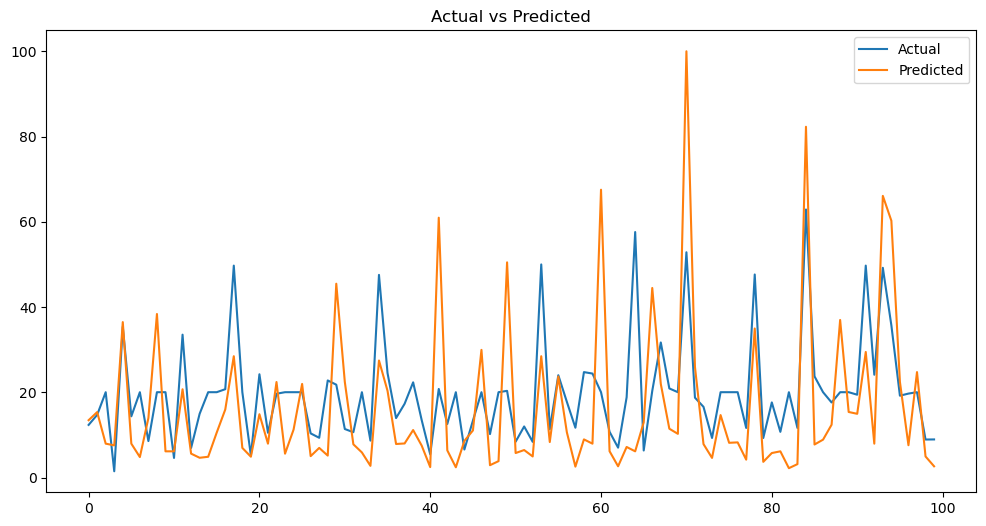

In [9]:
# Tahmin edilen değerler ile gerçek değerleri yanyana grafikte görelim
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

In [11]:
from sklearn.tree import DecisionTreeRegressor



# Modeli eğitme için geri kalan kodlarınızı ekleyin

dt = DecisionTreeRegressor()

# Eğitim verilerini kullanarak modeli eğitin
dt.fit(x_train, y_train)

# Test verilerini kullanarak tahmin yapın
y_predict_dt = dt.predict(x_test)

# Hata ölçümünü hesaplayın (örneğin, ortalama mutlak hata)
mae = mean_absolute_error(y_test, y_predict_dt)

print('Mean Absolute Error:', mae)

# Karekök ortalama hata karelerini hesaplayın (root mean squared error)
rmse = np.sqrt(mean_squared_error(y_test, y_predict_dt))
print('Root Mean Squared Error:', rmse)

# R^2 skorunu hesaplayın
r2 = r2_score(y_test, y_predict_dt)
print('Coefficient of determination R^2:', r2)




Mean Absolute Error: 6.527531189458688
Root Mean Squared Error: 10.572210731922311
Coefficient of determination R^2: 0.6483359813092879


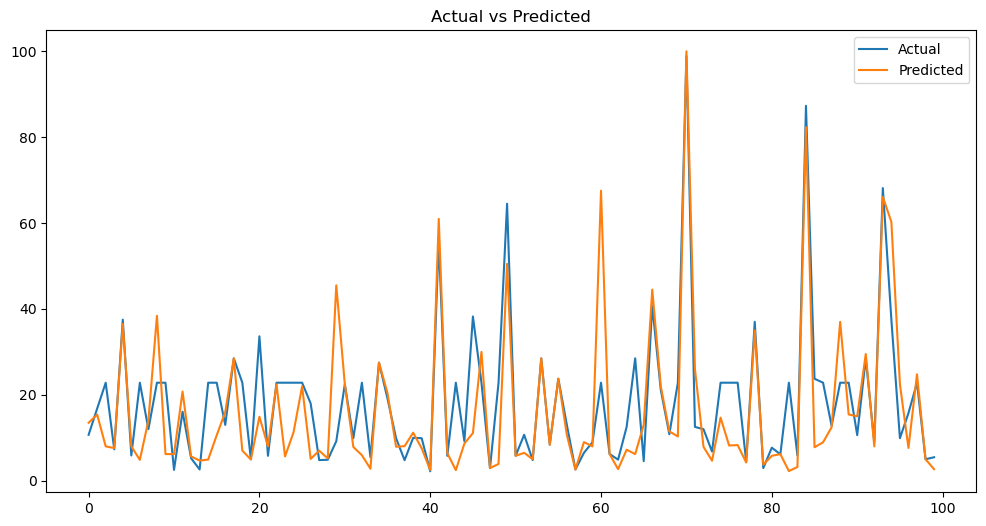

In [12]:
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_dt,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  10.833788474068452
 root mean squared error:  14.809804827931208
Coefficient of determination R^2:  0.309927083647357


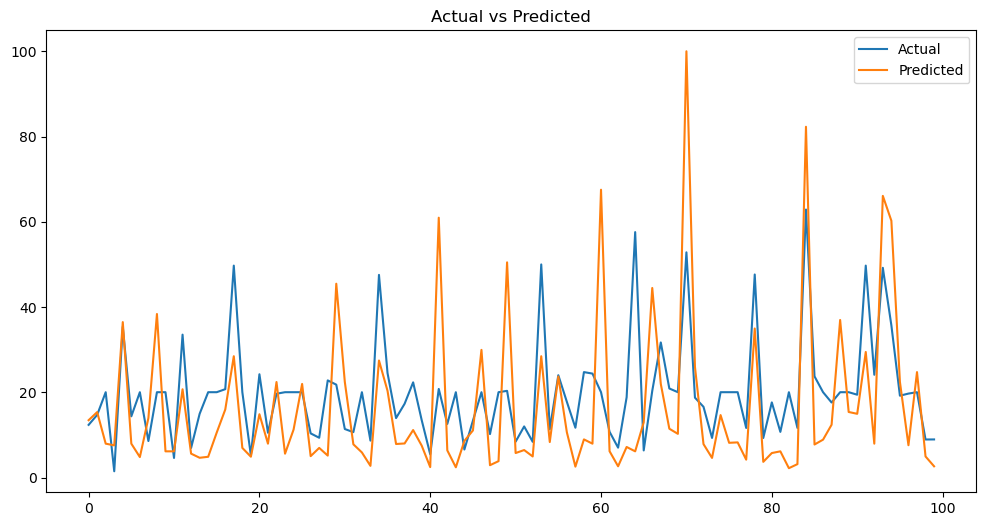

In [13]:
# Lasso regressyon için aynı uygulamayı yapalım 
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
y_predict_lasso = lasso.predict(x_test) 
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_lasso))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_lasso)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_lasso))

# Lasso İçin Tahmin Grafiği Çizelim
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lasso,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  6.596728881036667
root mean squared error:  9.852931292151089
Coefficient of determination R^2:  0.694559078681326


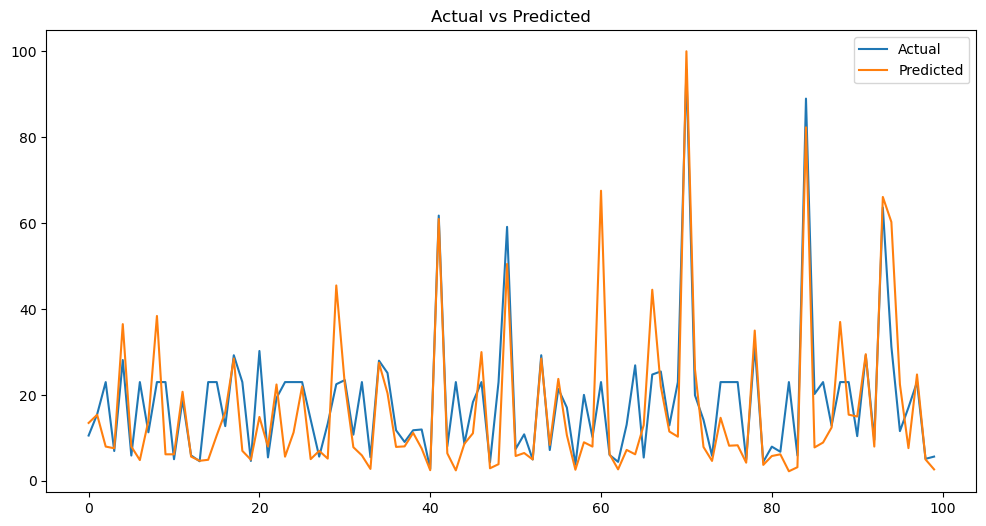

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  10.249373785093313
root mean squared error:  18.048875975580206
Coefficient of determination R^2:  -0.024935731189877908


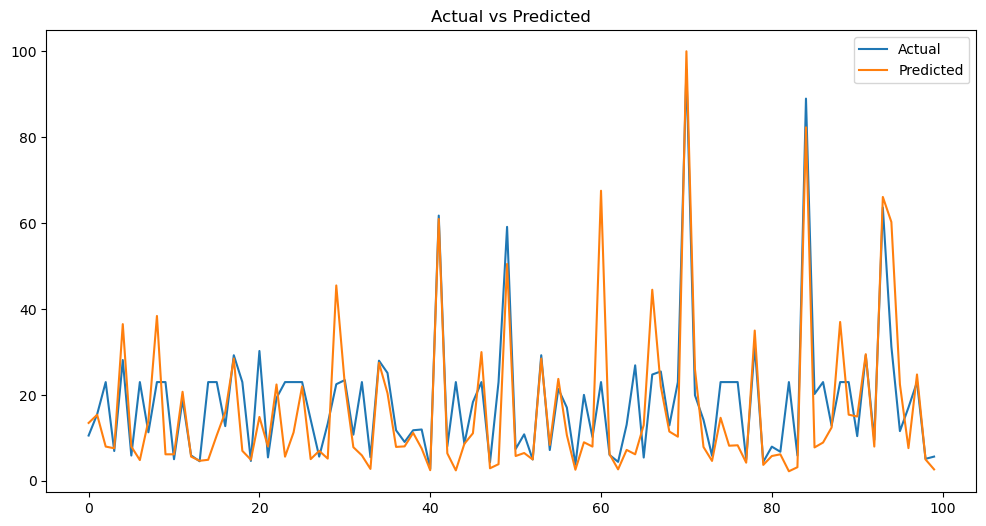

In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',degree=3)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
print('mean absolute error: ',mean_absolute_error(y_test, y_pred))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_pred))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

Mean Absolute Error (K-Nearest Neighbors): 7.433099333333334
Root Mean Squared Error (K-Nearest Neighbors): 10.953470157229932
Coefficient of Determination R^2 (K-Nearest Neighbors): 0.6225149372327482


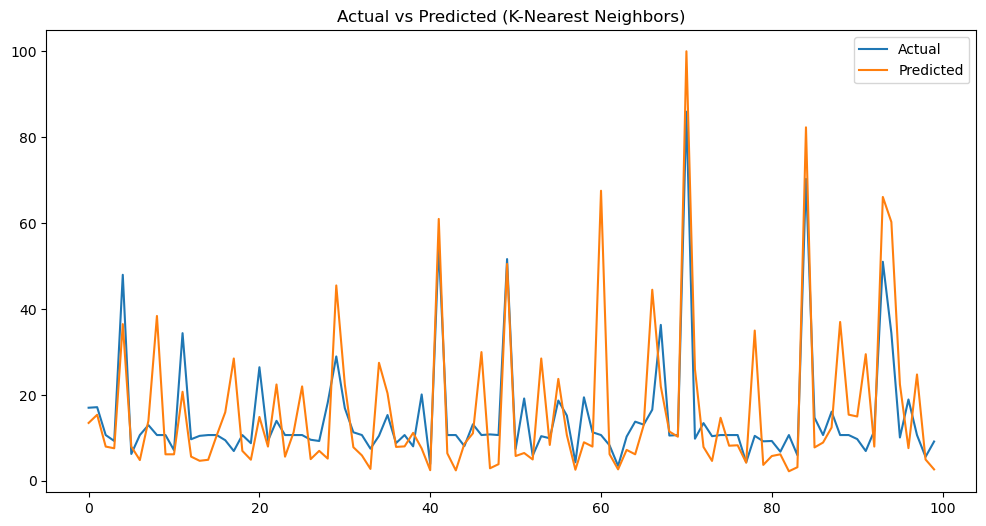

In [16]:


from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred_knn = knn_model.predict(x_test)

# Hata ölçümlerini hesaplayın
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

# Sonuçları yazdırın
print('Mean Absolute Error (K-Nearest Neighbors):', mae_knn)
print('Root Mean Squared Error (K-Nearest Neighbors):', rmse_knn)
print('Coefficient of Determination R^2 (K-Nearest Neighbors):', r2_knn)

# Tahminlerin ve gerçek değerlerin grafiğini çizin
fig = plt.figure(figsize=(12, 6))
result_knn = pd.DataFrame({'Predicted': y_pred_knn, 'Actual': y_test})
result_knn = result_knn.reset_index()
result_knn = result_knn.drop(['index'], axis=1)
plt.plot(result_knn[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted (K-Nearest Neighbors)')
plt.show()


Mean Absolute Error (Gradient Boosting): 6.584094618037762
Root Mean Squared Error (Gradient Boosting): 9.576375871090079
Coefficient of Determination R^2 (Gradient Boosting): 0.7114648816290647


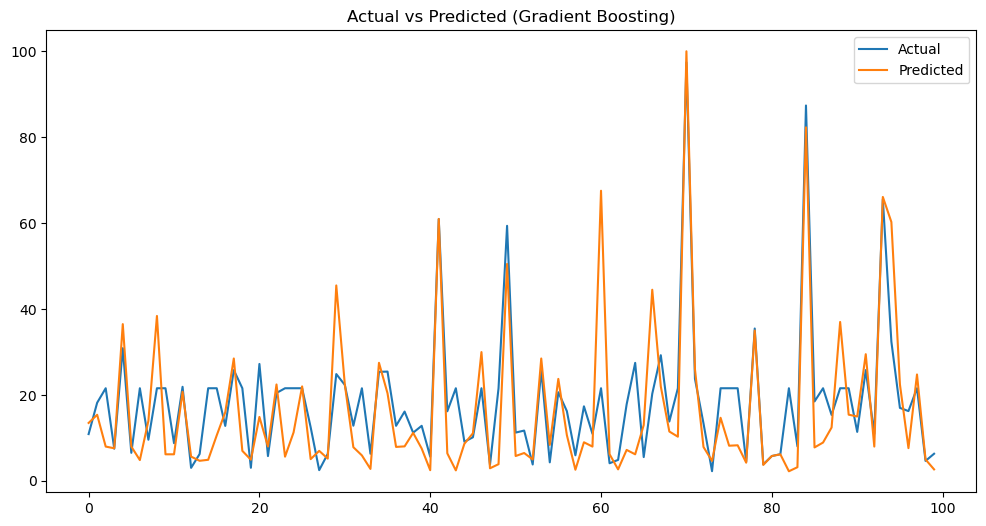

In [17]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



gb_model = GradientBoostingRegressor()
gb_model.fit(x_train, y_train)

# Test seti üzerinde tahmin yapın
y_pred_gb = gb_model.predict(x_test)

# Hata ölçümlerini hesaplayın
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Sonuçları yazdırın
print('Mean Absolute Error (Gradient Boosting):', mae_gb)
print('Root Mean Squared Error (Gradient Boosting):', rmse_gb)
print('Coefficient of Determination R^2 (Gradient Boosting):', r2_gb)

# Tahminlerin ve gerçek değerlerin grafiğini çizin
fig = plt.figure(figsize=(12, 6))
result_gb = pd.DataFrame({'Predicted': y_pred_gb, 'Actual': y_test})
result_gb = result_gb.reset_index()
result_gb = result_gb.drop(['index'], axis=1)
plt.plot(result_gb[:100])
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted (Gradient Boosting)')
plt.show()


In [ ]:
#GradientBoostingRegressor modellemesi en mantıklı olanıdır